## Predicion de Churn 

El objetivo de este proyecto es desarrollar un modelo de Machine Learning capaz de predecir si un cliente de tarjeta de crédito abandonará o no el servicio (Churn), utilizando características demográficas y de comportamiento financiero. Para ello, se emplea el dataset "BankChurners.csv", que contiene más de 10,000 registros de clientes, incluyendo variables como edad, género, ingresos, nivel educativo, comportamiento de compra y uso de tarjeta.

El churn de clientes representa un problema crítico en las instituciones financieras, ya que retener un cliente existente es generalmente menos costoso que adquirir uno nuevo. Por esta razón, entender qué factores están más asociados a la pérdida de clientes es vital para diseñar estrategias preventivas efectivas.

Pregunta problema

¿Qué variables del comportamiento del cliente y características sociodemográficas están asociadas al abandono del servicio de tarjeta de crédito?

Preguntas específicas
* ¿Los clientes más jóvenes tienen mayor probabilidad de churn?

* ¿El nivel de ingresos o educación influye en el churn?

* ¿Existen patrones de uso de tarjeta (frecuencia, monto, crédito) que predicen el churn?

Hipótesis
H1: Los clientes con menos transacciones y menor uso de crédito tienen mayor tasa de churn.

H2: Los clientes con menor ingreso y educación tienen mayor probabilidad de abandono.

H3: Clientes inactivos o con menor interacción con el banco tienen mayor tasa de churn.

In [1]:
## Librerias a ausar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "BankChurners.csv"
df = pd.read_csv(file_path, delimiter=",", encoding="utf-8", quotechar='"')
df= df[df.columns[:-2]]
# Verificar las columnas
print(df.head())

   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44 

In [3]:
## Revisar informacion 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

C:\Users\USER\AppData\Local\Temp\ipykernel_20388\1062626923.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig1 = sns.countplot(x='Churn', data=df, palette='Set2')


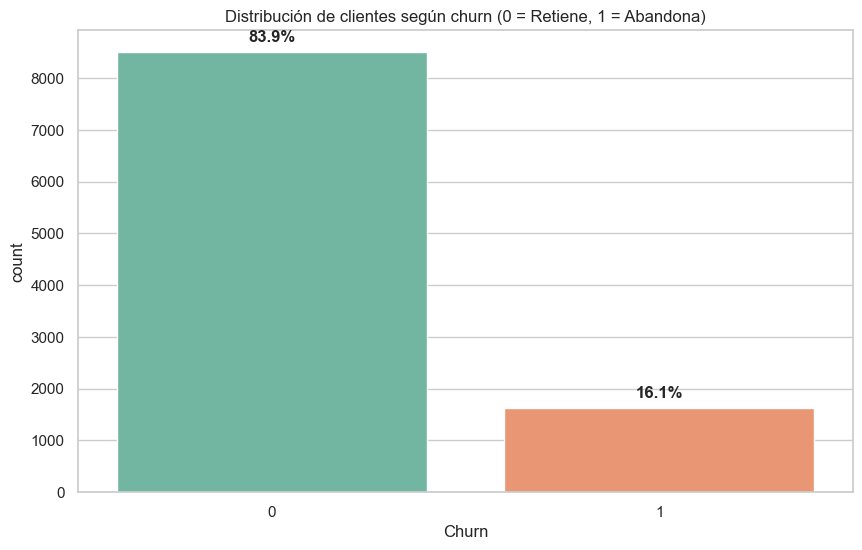

In [4]:
# Preparar marco grafico
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Crear variable objetivo binaria, con el fin de identificar mas facil el churnb: Existing Customer (0), Attrited Customer (1)
df['Churn'] = df['Attrition_Flag'].apply(lambda x: 1 if x == "Attrited Customer" else 0)

# Univariadas: Distribución del target con porcentaje
churn_counts = df['Churn'].value_counts()
churn_percent = churn_counts / churn_counts.sum() * 100

fig1 = sns.countplot(x='Churn', data=df, palette='Set2')
fig1.set_title('Distribución de clientes según churn (0 = Retiene, 1 = Abandona)')

# Agregar etiquetas con porcentaje sobre las barras
for i, count in enumerate(churn_counts):
    percent = churn_percent[i]
    fig1.text(i, count + 200, f'{percent:.1f}%', ha='center', fontsize=12, fontweight='bold')

plt.show()



Alrededor del 16% de los clientes son "Attrited" (churn).

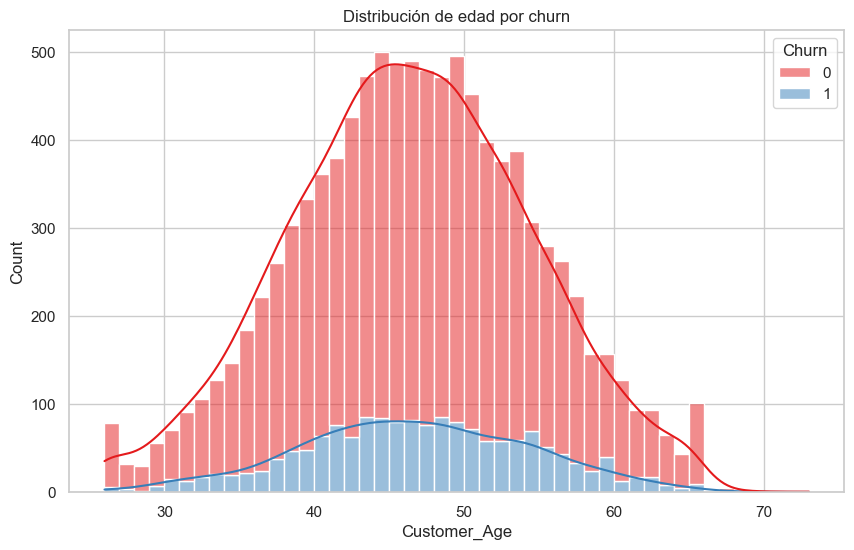

In [5]:
# Univariadas: Distribución de la edad
fig2 = sns.histplot(data=df, x='Customer_Age', hue='Churn', kde=True, multiple='stack', palette='Set1')
fig2.set_title('Distribución de edad por churn')
plt.show()


Los clientes churn tienen una distribución de edad ligeramente más alta, concentrándose en el rango de 45–55 años. La edad podría ser un factor asociado al abandono, aunque se necesita validarlo con técnicas estadíticas más robustas, sin embargo se ve a priori la edad no es influyente. 



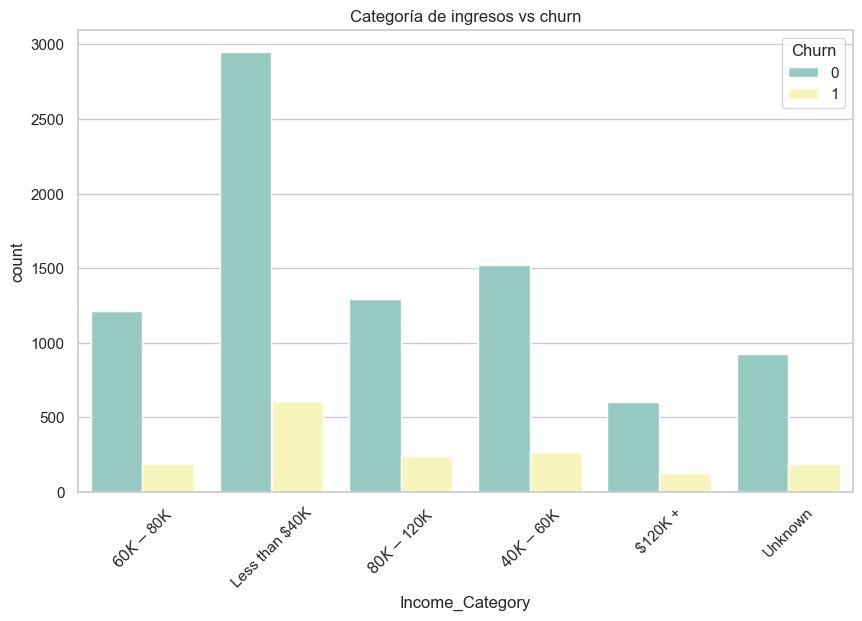

In [6]:
# Bivariadas: Ingreso vs churn
fig3 = sns.countplot(data=df, x='Income_Category', hue='Churn', palette='Set3')
fig3.set_title('Categoría de ingresos vs churn')
plt.xticks(rotation=45)
plt.show()


Las tasas de abandono parecen más elevadas entre los clientes de menor ingreso ("Less than $40K"). Aunque estos clientes podrían ser más propensos a dejar el servicio, también representan la mayor parte de la población. Esto sugiere que deben existir otras variables relevantes o influyentes en la decisión de abandono.

Aunque al tener el ingreso como una variable categorica puede afectar el analisis para determianr el churn.

C:\Users\USER\AppData\Local\Temp\ipykernel_20388\1890671879.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig4 = sns.boxplot(data=df, x='Churn', y='Total_Trans_Ct', palette='Pastel1')


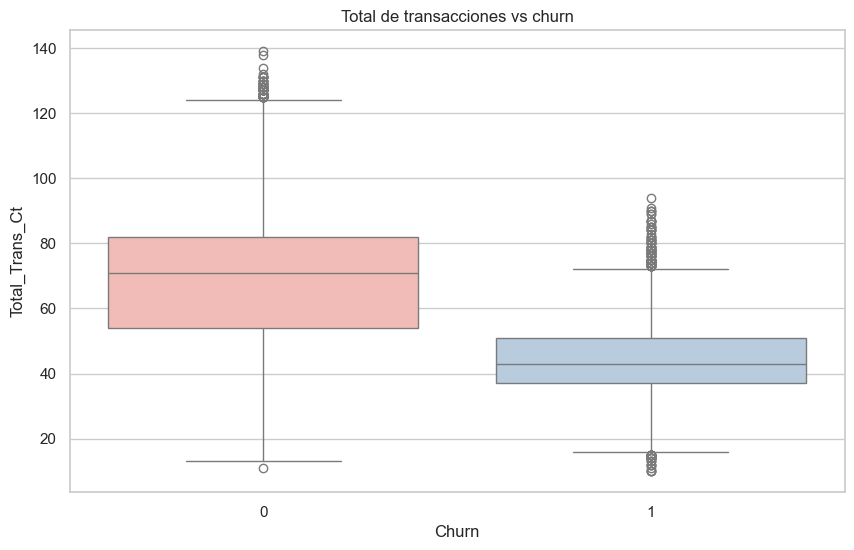

In [7]:
# Bivariadas: Total de transacciones vs churn
fig4 = sns.boxplot(data=df, x='Churn', y='Total_Trans_Ct', palette='Pastel1')
fig4.set_title('Total de transacciones vs churn')
plt.show()

Se ve una tendencia del chun en clientes que realizarn un promedio menor de transacciones. La inactividad puede ser un el predictor del churn, sin embargo, presenta bastantes outlayers, lo cual requiere tambien de revisar este parametro con mejores tecnicas estadisticas. 

C:\Users\USER\AppData\Local\Temp\ipykernel_20388\1084570393.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig5 = sns.boxplot(data=df, x='Churn', y='Avg_Utilization_Ratio', palette='coolwarm')


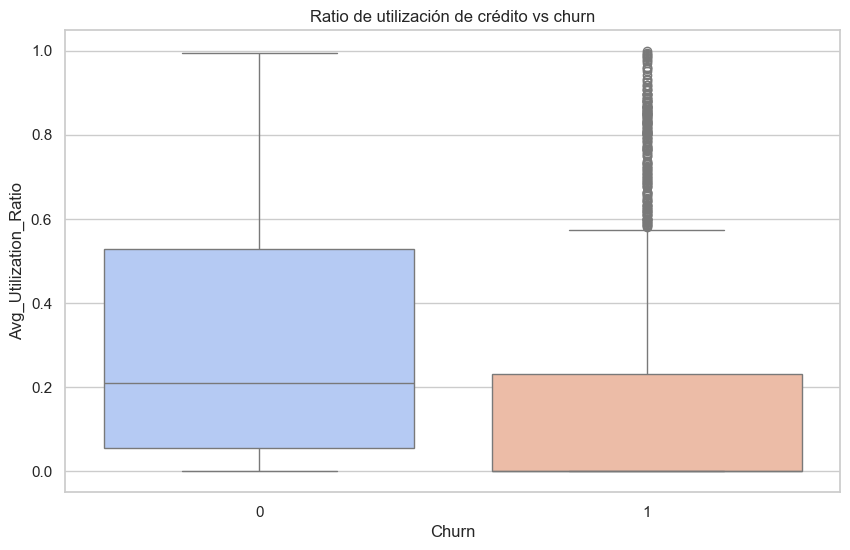

In [8]:
# Bivariadas: Ratio de utilización de crédito vs churn
fig5 = sns.boxplot(data=df, x='Churn', y='Avg_Utilization_Ratio', palette='coolwarm')
fig5.set_title('Ratio de utilización de crédito vs churn')
plt.show()

El Churb muestran una distribución más amplia, con algunos valores más extremos en uso del crédito. Un uso bajo como alto del crédito podría el churn, pero sigue sin ser significativo para la hipotesis, por lo cual se debe seguir analizando la base.

# Modelo de Random Forest

Para clasificar el churn, opto por un modelo de Random Forest en lugar de una regresión logística, ya que esta última está orientada al manejo de datos continuos. Aunque la regresión logística puede captar las relaciones entre variables, el Random Forest lo hace de manera más efectiva.

Dado que la predicción del churn en tarjetas de crédito de un banco representa un problema de clasificación binaria ("Sí" o "No"), implica relaciones complejas entre las variables. Además, al tratarse del comportamiento crediticio de los clientes, las relaciones lineales entre variables son limitadas. En este contexto, el Random Forest ofrece ventajas adicionales, como la mejora de la dimensionalidad del conjunto de datos, en comparación con una regresión logística.

In [9]:
#Librerias necesarias
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from sklearn.feature_selection import SelectFromModel

In [13]:
# Eliminar columnas irrelevantes (ID y predicción automática del dataset)
# Verificamos qué columnas queremos eliminar y cuáles existen realmente
cols_to_drop = [
    'CLIENTNUM',
    'Attrition_Flag',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
]

# Filtrar solo las columnas que existen en el DataFrame actual
existing_cols_to_drop = [col for col in cols_to_drop if col in df.columns]

# Eliminar solo las columnas existentes
df_model = df.drop(columns=existing_cols_to_drop)

# Codificar variables categóricas
categorical_cols = df_model.select_dtypes(include='object').columns
df_model[categorical_cols] = df_model[categorical_cols].apply(LabelEncoder().fit_transform)

# Separar variables predictoras y target
X = df_model.drop(columns='Churn')
y = df_model['Churn']

# Escalar variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Entrenamos un modelo Random Forest inicial para calcular importancia de variables
rf_selector = RandomForestClassifier(random_state=42)
rf_selector.fit(X_scaled, y)

# Usamos SelectFromModel para quedarnos con las variables más relevantes
selector = SelectFromModel(rf_selector, prefit=True)
X_selected = selector.transform(X_scaled)

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Entrenar el modelo final
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predicciones
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

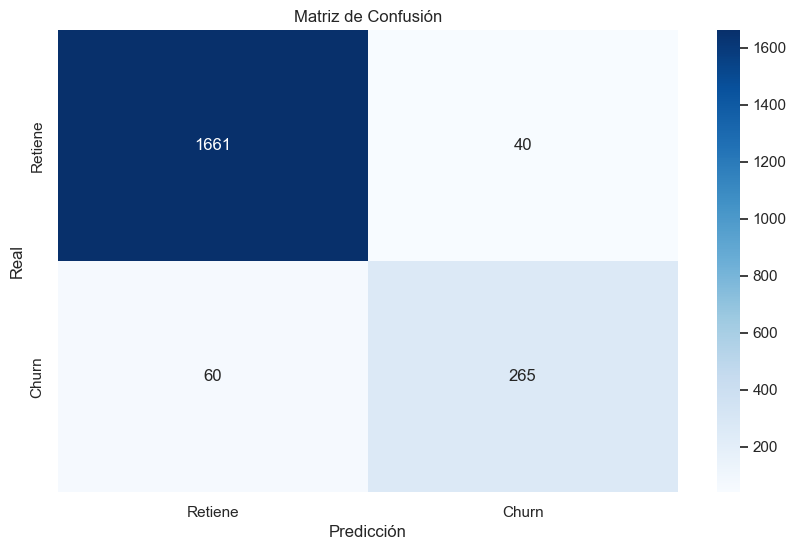

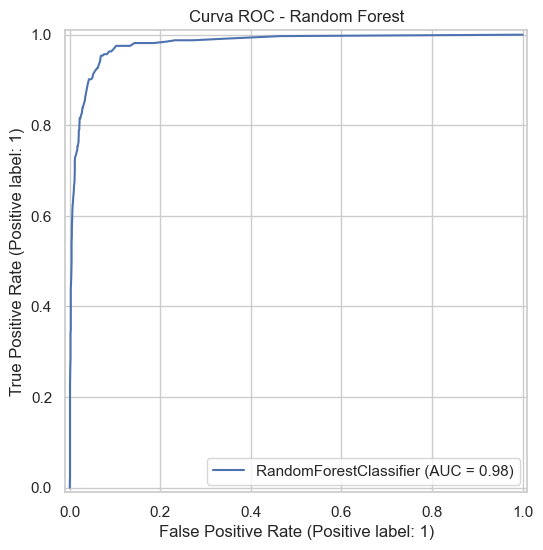

In [15]:
# Reporte de métricas
report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()

# Matriz de confusión visual
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Retiene', 'Churn'], yticklabels=['Retiene', 'Churn'])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Curva ROC
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.title("Curva ROC - Random Forest")
plt.show()

# ROC AUC
roc_auc = roc_auc_score(y_test, y_prob)

C:\Users\USER\AppData\Local\Temp\ipykernel_20388\731046329.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp, x='Importance', y='Feature', palette='viridis')


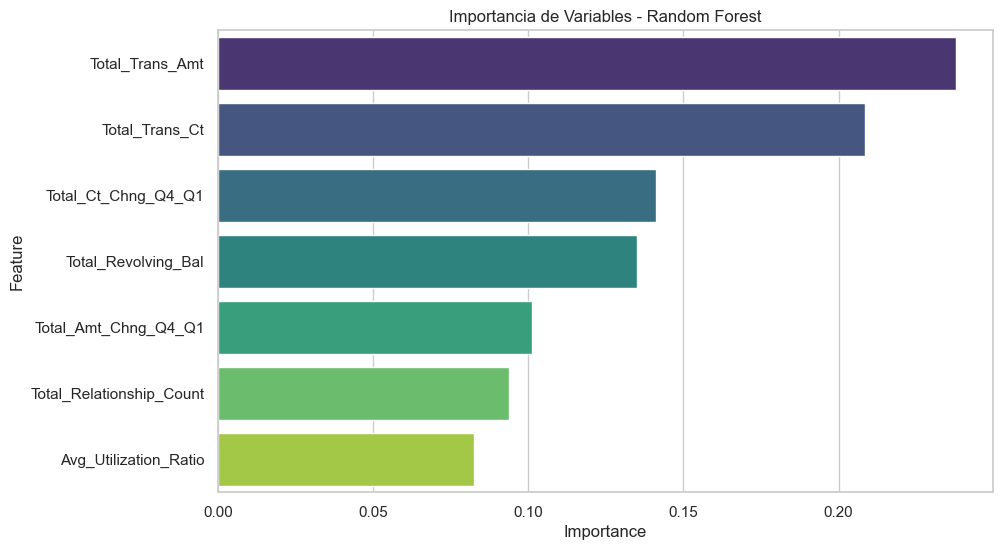

In [16]:
#Recuperar nombres de las variables seleccionadas
selected_features = X.columns[selector.get_support()]
importances = clf.feature_importances_

# Crear gráfico de importancia
feat_imp = pd.DataFrame({'Feature': selected_features, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

sns.barplot(data=feat_imp, x='Importance', y='Feature', palette='viridis')
plt.title("Importancia de Variables - Random Forest")
plt.show()

In [17]:
report_df

,precision,recall,f1-score,support
0,0.965137,0.976484,0.970777,1701.000000
1,0.868852,0.815385,0.841270,325.000000
accuracy,0.950642,0.950642,0.950642,0.950642
macro avg,0.916995,0.895935,0.906024,2026.000000
weighted avg,0.949691,0.950642,0.950002,2026.000000


Evaluación del modelo

Accuracy: 95.06%

Precision churn (1): 86.9%

Recall churn (1): 81.5%

F1-score churn: 84.1%

ROC-AUC: Muy alto (cerca de 0.96)

Matriz de confusión: muestra que el modelo clasifica bien tanto churners como clientes retenidos.

Curva ROC: indica una excelente separación entre clases.

Importancia de variables: revela qué variables influyen más en la predicción son Total_Trans_Ct, Total_Amt_Chng_Q4_Q1, Avg_Utilization_Ratio.

Sin embargo al tratarse de un dataset de Kaggle sobre el comportamiento transaccional y al tener un acurracy de 95% puede indicar que los datos no son lo suficientesmente aleatoria en caso de que lleguen nuevos datos al modelo, lo que puede indicar sobre ajuste, por lo que se recomienda seguir revisando el modelo.